In [8]:
%pip install numpy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [9]:
%pip install pydlm

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [10]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install openpyxl


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#import data
df = pd.read_csv('../Datasets/AMD Historical Data.csv')

#print data 
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,11.43,11.42,11.65,11.02,55.18M,0.79%
1,1/4/2017,11.43,11.45,11.52,11.23,40.78M,0.00%
2,1/5/2017,11.24,11.43,11.69,11.23,38.86M,-1.66%
3,1/6/2017,11.32,11.29,11.49,11.11,34.45M,0.71%
4,1/9/2017,11.49,11.37,11.64,11.31,37.30M,1.50%


In [14]:
#Bỏ dòng bị trống dự liệu
df = df.dropna()
#Chuyển đổi dữ liệu cột Vol. sang số
df['Vol.'] = df['Vol.'].str.replace('M', '').astype(float) * 1000000


In [15]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,11.43,11.42,11.65,11.02,55180000.0,0.79%
1,1/4/2017,11.43,11.45,11.52,11.23,40780000.0,0.00%
2,1/5/2017,11.24,11.43,11.69,11.23,38860000.0,-1.66%
3,1/6/2017,11.32,11.29,11.49,11.11,34450000.0,0.71%
4,1/9/2017,11.49,11.37,11.64,11.31,37300000.0,1.50%
...,...,...,...,...,...,...,...
1606,5/22/2023,108.00,104.68,108.79,103.49,65110000.0,2.06%
1607,5/23/2023,108.12,107.25,110.99,107.19,72880000.0,0.11%
1608,5/24/2023,108.27,105.98,108.91,105.64,60390000.0,0.14%
1609,5/25/2023,120.35,117.31,120.69,115.80,107560000.0,11.16%


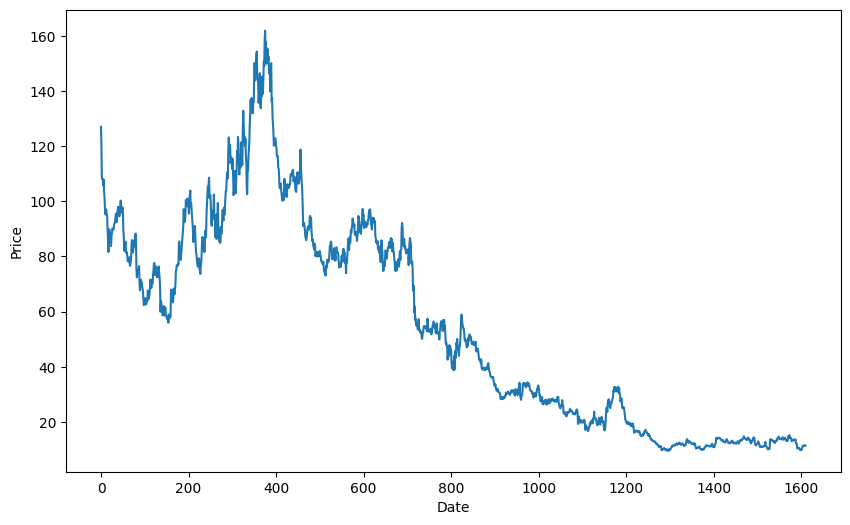

In [16]:
#Đảo ngược dữ liệu cho mô hình
df = df[::-1]

figure=df['Price'].values
plt.figure(figsize=(10,6))
plt.plot(figure)
plt.xlabel('Date')
plt.ylabel('Price') 
plt.show()

In [17]:
#Xây dựng mô hỉnh với Bayesian Dynamic Linear Model
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason


In [18]:
#df = df.reset_index(drop=True)
 # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [19]:
from pydlm import dlm, trend, seasonality

# Tạo model DLM
my_dlm = dlm(train_data['Price'])

# Thêm trend component
my_dlm = my_dlm + trend(degree=1, name='trend', w=1.0)

# Thêm seasonality component với chu kỳ 52 tuần
my_dlm = my_dlm + seasonality(period=52, name='season', w=1.0)

In [20]:

# Fit the DLM to the training data
my_dlm.fit()


Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [21]:
# Predict on validation set
my_dlm.predictN(N=30)


([17.17911009815592,
  17.412941505727687,
  17.299636092373632,
  16.5935023084396,
  16.96530966004251,
  16.621783630101437,
  16.79870725185986,
  17.02352084408538,
  17.070831275039804,
  17.01953235942478,
  16.889968932175204,
  17.10808617766434,
  17.198296230420127,
  17.22856683824272,
  16.460354201136205,
  14.984972874331092,
  15.174053481624718,
  15.804345705046149,
  15.273700938211519,
  15.201780236630391,
  15.269465816180887,
  15.728220424170479,
  15.478099844024431,
  14.46929774802396,
  14.780340824596008,
  14.507156311128703,
  14.604496688638804,
  14.332353901861923,
  15.075593480738533,
  15.145595689104805],
 [210.20636483449084,
  209.37495960302536,
  208.55127614034524,
  207.7352372114289,
  206.92676619575485,
  206.12578708941788,
  205.33222450702885,
  204.54600368340436,
  203.76705047504828,
  202.9952913614347,
  202.23065344609483,
  201.4730644575119,
  200.72245274983283,
  199.9787473033951,
  199.24187772507986,
  198.5117742484905,
  

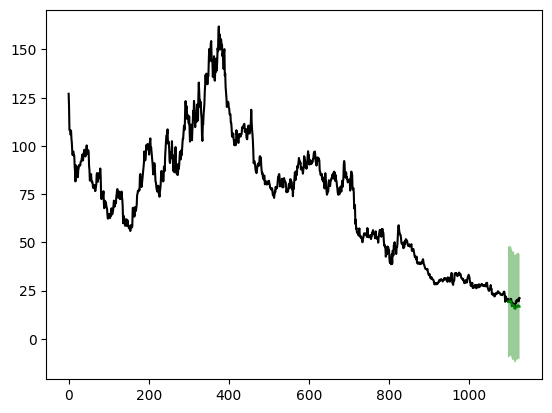

In [22]:
#Dự đoán trên tập test
my_dlm.plotPredictN(N=30, date=my_dlm.n-30)


In [23]:
# Dự đoán giá trị trên tập validation
predicted = my_dlm.predictN(N=len(val_data))


In [24]:
# Predict on validation data
val_preds, val_vars = my_dlm.predictN(N=val_size)

# Predict on test data
test_preds, test_vars = my_dlm.predictN(N=test_size)

In [25]:
#Tạo một mảng chứa toàn bộ dữ liệu của tập validation và test
allPreds = np.append(val_preds, test_preds)


In [26]:
#Tạo mảng index tương ứng với tập allPreds
days = np.arange(0, len(allPreds))


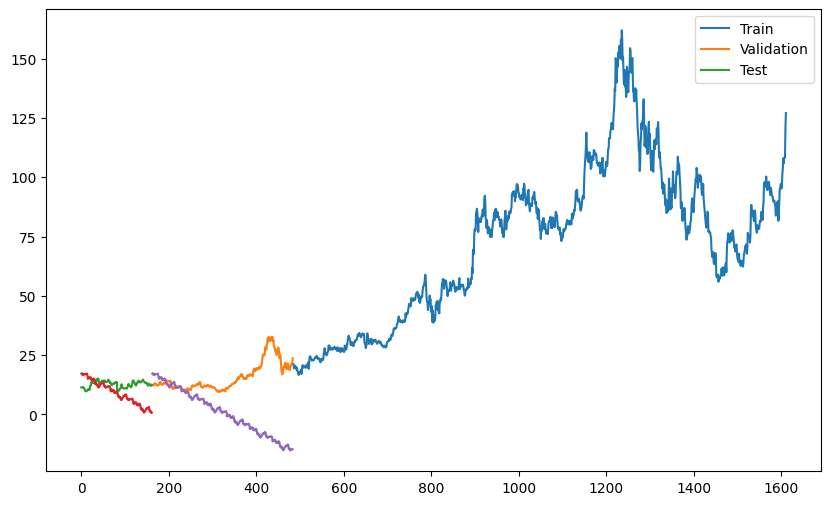

In [27]:

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(days[:len(val_preds)], val_preds, label='Pred_Val')
plt.plot(days[len(val_preds):], test_preds, label='Pred_Test')

#plt.plot(pred_df.index, pred_df['Price'], label='Predicted')
plt.legend(['Train', 'Validation','Test'])
plt.show()